In [22]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import ndarray
from sklearn.datasets import fetch_openml
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer, Normalizer
from sklearn.linear_model import LogisticRegression

from TrainUtils import conduct_training, whole_in_one
from PlotUtils import plot_mnist_samples
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


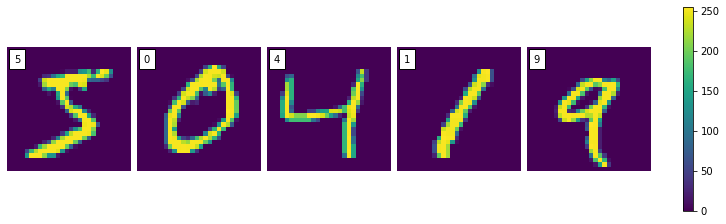

In [23]:
X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)
X = X.astype('uint16')
y = y.astype('uint8')

plot_mnist_samples(X, y)

In [24]:
quant_trans_uniform = QuantileTransformer(output_distribution="uniform")

> Current metric is: accuracy
> Best metric is: 0.921


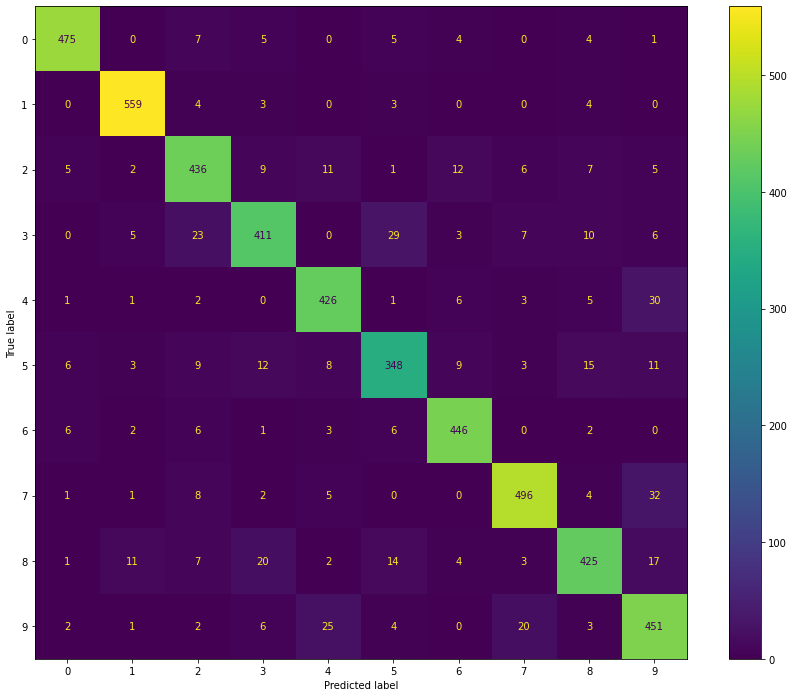

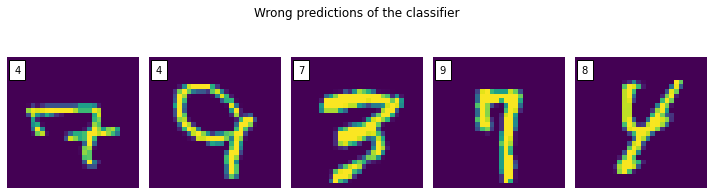

In [25]:
clf = make_pipeline(quant_trans_uniform, LogisticRegression(C=1, multi_class="multinomial", solver="saga", tol=0.1))
best_clf = whole_in_one(clf=clf, X=X, y=y, train_size=5000)

> Current metric is: accuracy
> Best metric is: 0.9185


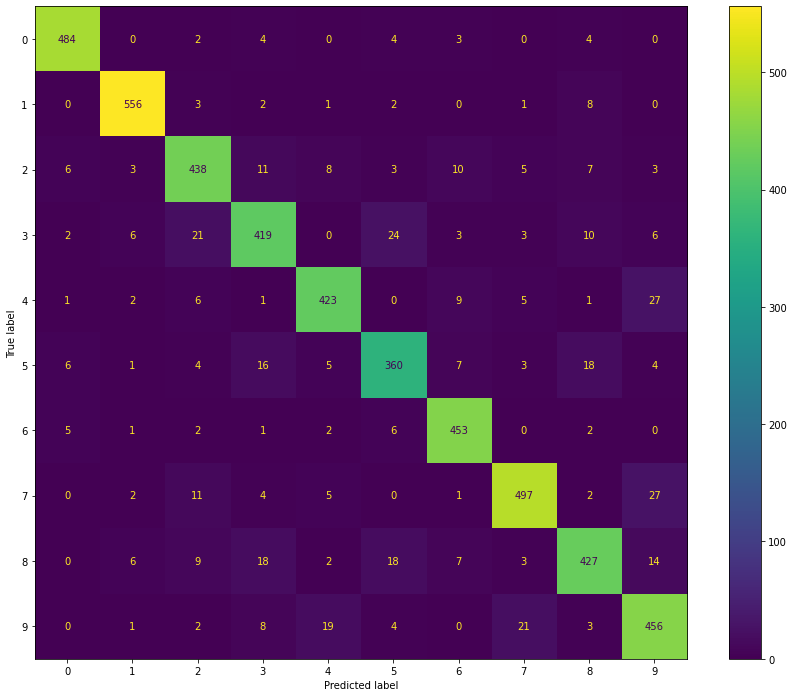

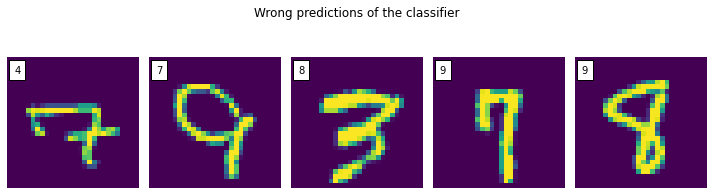

In [26]:
clf = make_pipeline(quant_trans_uniform, LogisticRegression(C=1, multi_class="multinomial", solver="saga", tol=0.01))
best_clf = whole_in_one(clf=clf, X=X, y=y, train_size=10000)

In [ ]:
best_clf = best_clf[1]

# Внутреннее представление MNIST

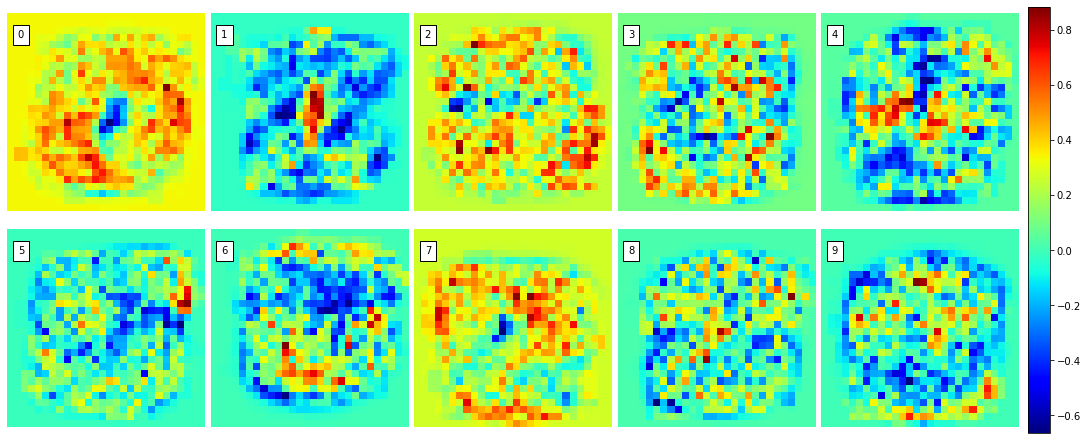

In [21]:
plot_mnist_samples(best_clf.coef_, best_clf.classes_, cmap=plt.cm.jet, rows=2, cols=5, figsize=(15, 6))